# Data Introduction

## Import necessary modules

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Read and choose relevant columns

In [35]:
# Load the data
df = pd.read_csv('Intel_CPUs.csv')
# Choose the columns to display
col = ["Product_Collection", "Vertical_Segment","Processor_Number", "Status", "Launch_Date", "Lithography", "Recommended_Customer_Price", 
       "nb_of_Cores", "nb_of_Threads", "Processor_Base_Frequency", "Cache", "TDP", "Max_Memory_Size", "Memory_Types", "Max_nb_of_Memory_Channels",
       "Max_Memory_Bandwidth", "Graphics_Base_Frequency", "Graphics_Max_Dynamic_Frequency", "Graphics_Video_Max_Memory", "Max_Resolution_HDMI",
       "Max_Resolution_DP", "Max_Resolution_eDP_Integrated_Flat_Panel", "PCI_Express_Revision", "Instruction_Set"]
# Display the first 15 rows of the dataframe
df = df[col]
display(df.head(15)) 

,Product_Collection,Vertical_Segment,Processor_Number,Status,Launch_Date,Lithography,Recommended_Customer_Price,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,...,Max_nb_of_Memory_Channels,Max_Memory_Bandwidth,Graphics_Base_Frequency,Graphics_Max_Dynamic_Frequency,Graphics_Video_Max_Memory,Max_Resolution_HDMI,Max_Resolution_DP,Max_Resolution_eDP_Integrated_Flat_Panel,PCI_Express_Revision,Instruction_Set
0,7th Generation Intel® Core™ i7 Processors,Mobile,i7-7Y75,Launched,Q3'16,14 nm,$393.00,2,4.0,1.30 GHz,...,2.0,29.8 GB/s,300 MHz,1.05 GHz,16 GB,4096x2304@24Hz,3840x2160@60Hz,3840x2160@60Hz,3,64-bit
1,8th Generation Intel® Core™ i5 Processors,Mobile,i5-8250U,Launched,Q3'17,14 nm,$297.00,4,8.0,1.60 GHz,...,2.0,34.1 GB/s,300 MHz,1.10 GHz,32 GB,4096x2304@24Hz,4096x2304@60Hz,4096x2304@60Hz,3,64-bit
2,8th Generation Intel® Core™ i7 Processors,Mobile,i7-8550U,Launched,Q3'17,14 nm,$409.00,4,8.0,1.80 GHz,...,2.0,34.1 GB/s,300 MHz,1.15 GHz,32 GB,4096x2304@24Hz,4096x2304@60Hz,4096x2304@60Hz,3,64-bit
3,Intel® Core™ X-series Processors,Desktop,i7-3820,End of Life,Q1'12,32 nm,$305.00,4,8.0,3.60 GHz,...,4.0,51.2 GB/s,NaN,NaN,NaN,NaN,NaN,NaN,2,64-bit
4,7th Generation Intel® Core™ i5 Processors,Mobile,i5-7Y57,Launched,Q1'17,14 nm,$281.00,2,4.0,1.20 GHz,...,2.0,29.8 GB/s,300 MHz,950 MHz,16 GB,4096x2304@24Hz,3840x2160@60Hz,3840x2160@60Hz,3,64-bit
5,Intel® Celeron® Processor 3000 Series,Mobile,3205U,Launched,Q1'15,14 nm,$107.00,2,2.0,1.50 GHz,...,2.0,25.6 GB/s,100 MHz,800 MHz,NaN,NaN,NaN,NaN,2,64-bit
6,Intel® Celeron® Processor N Series,Mobile,N2805,Launched,Q3'13,22 nm,NaN,2,2.0,1.46 GHz,...,1.0,NaN,313 MHz,667 MHz,NaN,NaN,NaN,NaN,2,64-bit
7,Intel® Celeron® Processor J Series,Desktop,J1750,Launched,Q3'13,22 nm,NaN,2,2.0,2.41 GHz,...,2.0,NaN,688 MHz,750 MHz,NaN,NaN,NaN,NaN,2,64-bit
8,Intel® Celeron® Processor G Series,Desktop,G1610,Launched,Q1'13,22 nm,$42.00,2,2.0,2.60 GHz,...,2.0,21 GB/s,650 MHz,1.05 GHz,NaN,NaN,NaN,NaN,2,64-bit
9,Legacy Intel® Pentium® Processor,Mobile,518,End of Interactive Support,NaN,90 nm,NaN,1,NaN,2.80 GHz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32-bit


## Plot data with missing values

                                      Column  Missing Values
0                         Product_Collection               0
1                           Vertical_Segment               0
2                           Processor_Number             349
3                                     Status               0
4                                Launch_Date             412
5                                Lithography              71
6                 Recommended_Customer_Price             982
7                                nb_of_Cores               0
8                              nb_of_Threads             856
9                   Processor_Base_Frequency              18
10                                     Cache              12
11                                       TDP              67
12                           Max_Memory_Size             880
13                              Memory_Types             883
14                 Max_nb_of_Memory_Channels             869
15                      

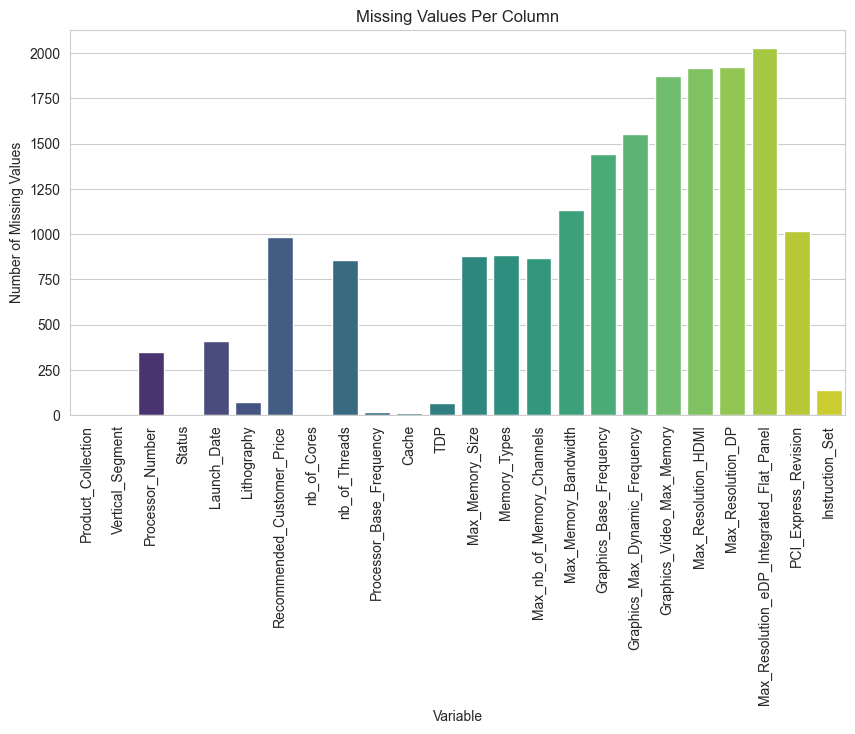

In [36]:
def plot():
    missing_counts = df.isnull().sum()
    
    # Create a dataframe to store the missing values
    missing_data = missing_counts.reset_index()
    missing_data.columns = ["Column", "Missing Values"]
    print(missing_data)
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Column", y="Missing Values", data=missing_data, hue="Column", palette="viridis", legend=False)
    
    plt.xticks(rotation=90)  # Rotate the x-axis labels
    plt.xlabel("Variable")
    plt.ylabel("Number of Missing Values")
    plt.title("Missing Values Per Column")
    plt.show()
plot()

# Data Preprocessing

## Drop data with missing values
### We will choose columns with missing values above 70%

                            Column  Missing Values
0               Product_Collection               0
1                 Vertical_Segment               0
2                 Processor_Number             349
3                           Status               0
4                      Launch_Date             412
5                      Lithography              71
6       Recommended_Customer_Price             982
7                      nb_of_Cores               0
8                    nb_of_Threads             856
9         Processor_Base_Frequency              18
10                           Cache              12
11                             TDP              67
12                 Max_Memory_Size             880
13                    Memory_Types             883
14       Max_nb_of_Memory_Channels             869
15            Max_Memory_Bandwidth            1136
16         Graphics_Base_Frequency            1444
17  Graphics_Max_Dynamic_Frequency            1554
18            PCI_Express_Revis

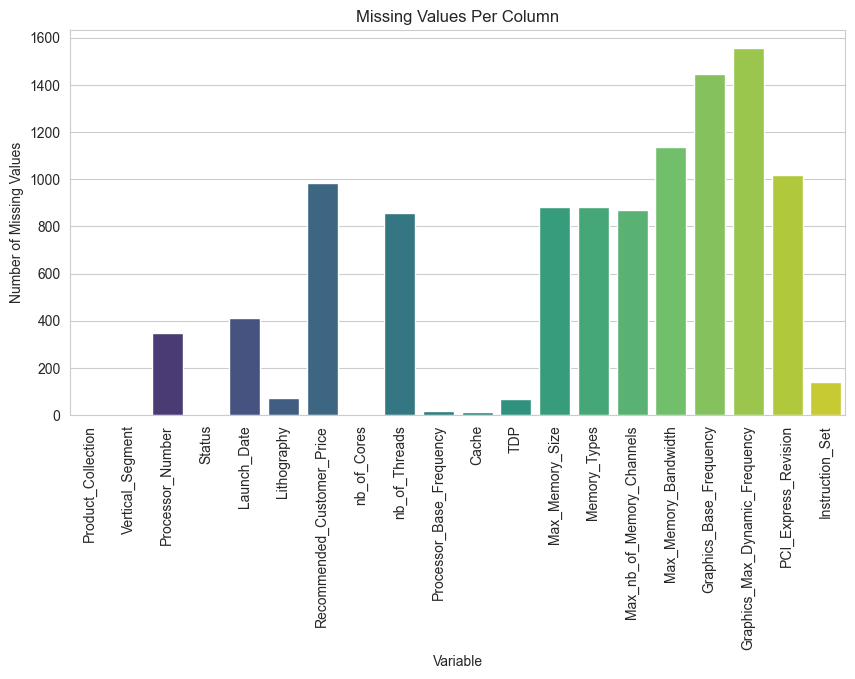

Total of rows with missing values : 1774


In [37]:
threshold = len(df) * 0.3
# Drop columns where the count of missing values exceeds the threshold
df.dropna(axis=1, thresh=threshold, inplace=True)
plot()
# Check if there are any missing values left
has_missing = df.isnull().any(axis=1)
print("Total of rows with missing values :" , has_missing.sum()) # Count the number of rows with missing values

## Split Column and Standardize Data Types

### Standardize Product Collection

In [38]:
# Adjust the data types of the columns 
def categorize_product(collection):
    if "Core" in collection:
        return "Core"
    elif "Pentium" in collection:
        return "Pentium"
    elif "Celeron" in collection:
        return "Celeron"
    elif "Xeon" in collection:
        return "Xeon"
    elif "Atom" in collection:
        return "Atom"
    elif "Itanium" in collection:
        return "Itanium"
    elif "Quark" in collection:
        return "Quark"
    else:
        return "Other"


df["Product_Collection"] = df["Product_Collection"].apply(categorize_product)
display("Number of true data: ",df["Product_Collection"].value_counts().sum())
display("Number of missing data: ",df["Product_Collection"].isnull().sum())

'Number of true data: '

2283

'Number of missing data: '

0

### Standardize Launch Date

In [39]:
quarter = df["Launch_Date"].str.extract(r"(Q\d)").squeeze()  
year = df["Launch_Date"].str.extract(r"(\d{2})").squeeze()   

year = pd.to_numeric(year, errors='coerce')  
year = year.apply(lambda x: 2000 + x if x < 50 else 1900 + x if pd.notna(x) else x)

quarter_mapping = {"Q1": 0.00, "Q2": 0.25, "Q3": 0.50, "Q4": 0.75}
quarter = quarter.map(quarter_mapping)

df["Launch_Date"] = year + quarter  
print(df["Launch_Date"].head(10))

0    2016.5
1    2017.5
2    2017.5
3    2012.0
4    2017.0
5    2015.0
6    2013.5
7    2013.5
8    2013.0
9       NaN
Name: Launch_Date, dtype: float64


### Standardize Lithography

In [40]:
df["Lithography"] = df["Lithography"].str.replace("nm", "").astype(float)
df["Lithography"] = df["Lithography"].astype(float)
display("Number of true data: ",df["Lithography"].value_counts().sum())
display("Number of missing data: ",df["Lithography"].isnull().sum())

'Number of true data: '

2212

'Number of missing data: '

71

### Standardize Recommended Customer Price

In [41]:
def clean_price(value):
    if pd.isnull(value):
        return value  # Return the missing value as is
    value = value.replace("$", "").replace(",", "")  # Remove the dollar sign and commas
    if " - " in value:  
        prices = list(map(float, value.split(" - ")))  # Split the range and convert the prices to floats
        return round(sum(prices) / len(prices), 2)  # Return the average of the prices
    return float(value)  # If the value is a single price, convert it to a float
# Apply the function to the Recommended_Customer_Price column
df["Recommended_Customer_Price"] = df["Recommended_Customer_Price"].apply(clean_price)


### Standardize Processor Base Frequency

In [42]:
split_df = df['Processor_Base_Frequency'].str.split(' ', expand=True)
split_df.columns = ['number', 'unit']
split_df['number'] = pd.to_numeric(split_df['number'])
# Check the unique units in the 'unit' column
unique_units = split_df['unit'].unique()
print("the unique units:", unique_units)
# Convert MHz to GHz
split_df['number'] = split_df.apply(lambda row: row['number'] / 1024 if row['unit'] == 'MHz' else row['number'], axis=1)
# Assign back to original DataFrame
df['Processor_Base_Frequency'] = split_df['number']
display(df['Processor_Base_Frequency'].head(5))

the unique units: ['GHz' 'MHz' nan]


0    1.3
1    1.6
2    1.8
3    3.6
4    1.2
Name: Processor_Base_Frequency, dtype: float64

### Standardize Cache

In [43]:
cache_split = df["Cache"].str.extract(r"(?:(\d*\.?\d+)\s*(KB|MB)?)?\s*(.*)")

cache_split.columns = ["Cache_Value", "Unit", "Type_of_Cache"]

cache_split["Cache_Value"] = pd.to_numeric(cache_split["Cache_Value"], errors="coerce")

cache_split["Cache_Value"] = np.where(cache_split["Unit"] == "KB", 
                                      cache_split["Cache_Value"] / 1024, 
                                      cache_split["Cache_Value"])

df["Cache_Size"] = cache_split["Cache_Value"]
df["Cache_Types"] = cache_split["Type_of_Cache"].str.strip()
df["Cache_Types"] = df["Cache_Types"].replace("", "No Type").fillna("No Type")
df = df.drop(columns=["Cache"])

print("Number of true data:", df["Cache_Size"].notnull().sum())
print("Number of missing data:", df["Cache_Size"].isnull().sum())


Number of true data: 2271
Number of missing data: 12


### Standardize TDP

In [44]:
df["TDP"] = df["TDP"].str.replace("W", "").astype(float)
df["TDP"] = df["TDP"].astype(float)
display("Number of true data: ",df["TDP"].value_counts().sum())
display("Number of missing data: ",df["TDP"].isnull().sum())

'Number of true data: '

2216

'Number of missing data: '

67

### Standardize Max Memory Size

In [45]:
split_df = df['Max_Memory_Size'].str.split(' ', expand=True)
split_df.columns = ['number', 'unit']
split_df['number'] = pd.to_numeric(split_df['number'])
# Check the unique units in the 'unit' column
unique_units = split_df['unit'].unique()
print("the unique units:", unique_units)
# Convert TB to GB
split_df['number'] = split_df.apply(lambda row: row['number'] * 1024 if row['unit'] == 'TB' else row['number'], axis=1)
# Assign back to original DataFrame
df['Max_Memory_Size'] = split_df['number']
display(df['Max_Memory_Size'].head(5))



the unique units: ['GB' nan 'TB']


0    16.00
1    32.00
2    32.00
3    64.23
4    16.00
Name: Max_Memory_Size, dtype: float64

### Standardize Memory Types

In [46]:
def extract_memory_types(mem_type):
    if pd.isna(mem_type) or mem_type.strip() == '':
        return None  # Nan or string
    
    # Find all DDR or LPDDR memory types
    memory_matches = re.findall(r'(DDR\d+[L]?)', mem_type)
    
    # Eliminate duplicates and sort the memory types
    return ', '.join(sorted(set(memory_matches)))

# Apply the function to the 'Memory_Types' column
df['Memory_Types'] = df['Memory_Types'].apply(extract_memory_types)
display(df['Memory_Types'].value_counts().sum())
display(df['Memory_Types'].isnull().sum())

1400

883

### Standarize Max Memory Bandwidth

In [47]:
split_df = df['Max_Memory_Bandwidth'].str.split(' ', expand=True)
split_df.columns = ['number', 'unit']
split_df['number'] = pd.to_numeric(split_df['number'])
df["Max_Memory_Bandwidth"] = split_df['number']
print(df["Max_Memory_Bandwidth"].value_counts().sum())
print(df["Max_Memory_Bandwidth"].isnull().sum())

1147
1136


### Standardize Graphic Base Frequency

In [48]:
split_df = df['Graphics_Base_Frequency'].str.split(' ', expand=True)
split_df.columns = ['number', 'unit']
split_df['number'] = pd.to_numeric(split_df['number'])

unique_units = split_df['unit'].unique()
print("The unique units:", unique_units)

split_df['number'] = split_df.apply(lambda row: round(row['number'] / 1024, 2) if row['unit'] == 'MHz' else round(row['number'], 2), axis=1)

df['Graphics_Base_Frequency'] = split_df['number']
display(df['Graphics_Base_Frequency'].head(5))



The unique units: ['MHz' nan 'GHz']


0    0.29
1    0.29
2    0.29
3     NaN
4    0.29
Name: Graphics_Base_Frequency, dtype: float64

### Standardize Graphics Max Dynamic Frequency

In [49]:
split_df = df['Graphics_Max_Dynamic_Frequency'].str.split(' ', expand=True)
split_df.columns = ['number', 'unit']
split_df['number'] = pd.to_numeric(split_df['number'])
unique_units = split_df['unit'].unique()
split_df = df['Graphics_Max_Dynamic_Frequency'].str.split(' ', expand=True)
split_df.columns = ['number', 'unit']
split_df['number'] = pd.to_numeric(split_df['number'])
unique_units = split_df['unit'].unique()
print("The unique units:", unique_units)

split_df['number'] = split_df.apply(lambda row: round(row['number'] / 1024, 2) if row['unit'] == 'MHz' else round(row['number'], 2), axis=1)

df['Graphics_Max_Dynamic_Frequency'] = split_df['number']

display(df['Graphics_Max_Dynamic_Frequency'].head(5))


The unique units: ['GHz' nan 'MHz']


0    1.05
1    1.10
2    1.15
3     NaN
4    0.93
Name: Graphics_Max_Dynamic_Frequency, dtype: float64

### Standardize PCI Express Revision

In [50]:
def clean_memory_channels(value):
    if pd.isnull(value):
        return value  
    elif isinstance(value, str):
        if "Up to" in value:
            return int(float(value.replace("Up to ", "")))  
        elif any(x in value for x in ["3.0 (16), 2.0 (1x4 lanes)", "(", "1.0a", "No"]):  
            return None 
        elif "/" in value:  
            return int(float(value.split("/")[0])) 
    try:
        return int(value) 
    except ValueError:
        return None  

# Apply the function to the 'PCI_Express_Revision' column
df["PCI_Express_Revision"] = df["PCI_Express_Revision"].apply(clean_memory_channels)
display(df["PCI_Express_Revision"].value_counts())

PCI_Express_Revision
3.0    747
2.0    506
Name: count, dtype: int64

### Standardize Instruction Set

Instruction_Set
64-bit    1721
32-bit     421
Name: count, dtype: int64

,Product_Collection,Vertical_Segment,Processor_Number,Status,Launch_Date,Lithography,Recommended_Customer_Price,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,...,Max_Memory_Size,Memory_Types,Max_nb_of_Memory_Channels,Max_Memory_Bandwidth,Graphics_Base_Frequency,Graphics_Max_Dynamic_Frequency,PCI_Express_Revision,Instruction_Set,Cache_Size,Cache_Types
0,Core,Mobile,i7-7Y75,Launched,2016.5,14.0,393.0,2,4.0,1.3,...,16.00,"DDR3, DDR3L",2.0,29.8,0.29,1.05,3.0,64-bit,4.0,SmartCache
1,Core,Mobile,i5-8250U,Launched,2017.5,14.0,297.0,4,8.0,1.6,...,32.00,"DDR3, DDR4",2.0,34.1,0.29,1.10,3.0,64-bit,6.0,SmartCache
2,Core,Mobile,i7-8550U,Launched,2017.5,14.0,409.0,4,8.0,1.8,...,32.00,"DDR3, DDR4",2.0,34.1,0.29,1.15,3.0,64-bit,8.0,SmartCache
3,Core,Desktop,i7-3820,End of Life,2012.0,32.0,305.0,4,8.0,3.6,...,64.23,DDR3,4.0,51.2,NaN,NaN,2.0,64-bit,10.0,SmartCache
4,Core,Mobile,i5-7Y57,Launched,2017.0,14.0,281.0,2,4.0,1.2,...,16.00,"DDR3, DDR3L",2.0,29.8,0.29,0.93,3.0,64-bit,4.0,SmartCache


                            Column  Missing Values
0               Product_Collection               0
1                 Vertical_Segment               0
2                 Processor_Number             349
3                           Status               0
4                      Launch_Date             414
5                      Lithography              71
6       Recommended_Customer_Price             982
7                      nb_of_Cores               0
8                    nb_of_Threads             856
9         Processor_Base_Frequency              18
10                             TDP              67
11                 Max_Memory_Size             880
12                    Memory_Types             883
13       Max_nb_of_Memory_Channels             869
14            Max_Memory_Bandwidth            1136
15         Graphics_Base_Frequency            1444
16  Graphics_Max_Dynamic_Frequency            1554
17            PCI_Express_Revision            1030
18                 Instruction_

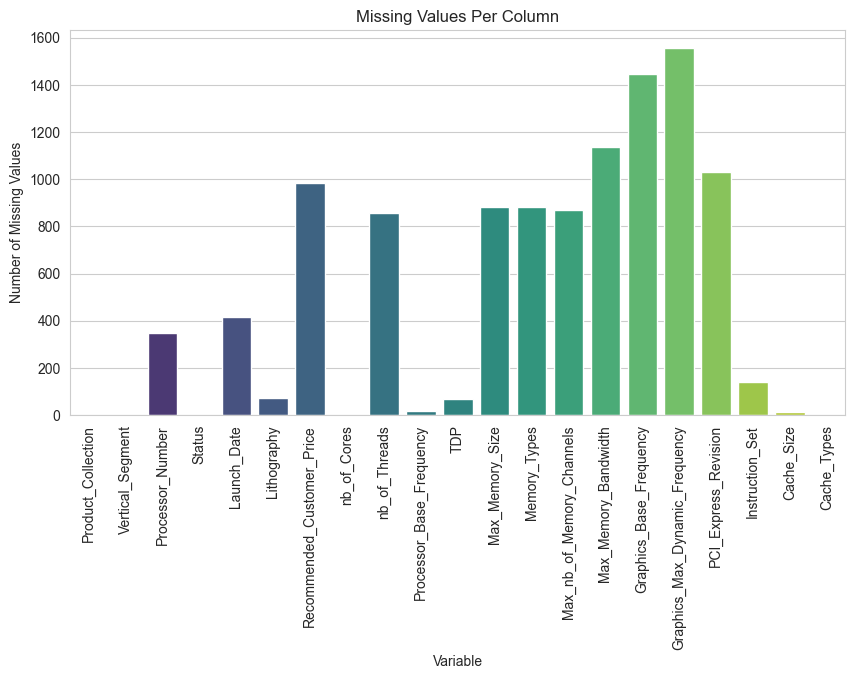

In [51]:
df["Instruction_Set"] = df["Instruction_Set"].replace("Itanium 64-bit", "64-bit")
display(df["Instruction_Set"].value_counts())

display(df.head(5))
plot()

## Handling missing values

### Removing missing rows
Here, we choose the columns where the number of missing value rows is at least a certain threshold.

Number of rows removed: 621
                            Column  Missing Values
0               Product_Collection               0
1                 Vertical_Segment               0
2                 Processor_Number               0
3                           Status               0
4                      Launch_Date               0
5                      Lithography               0
6       Recommended_Customer_Price             480
7                      nb_of_Cores               0
8                    nb_of_Threads             383
9         Processor_Base_Frequency               0
10                             TDP               0
11                 Max_Memory_Size             382
12                    Memory_Types             387
13       Max_nb_of_Memory_Channels             371
14            Max_Memory_Bandwidth             569
15         Graphics_Base_Frequency             873
16  Graphics_Max_Dynamic_Frequency             939
17            PCI_Express_Revision             492
18 

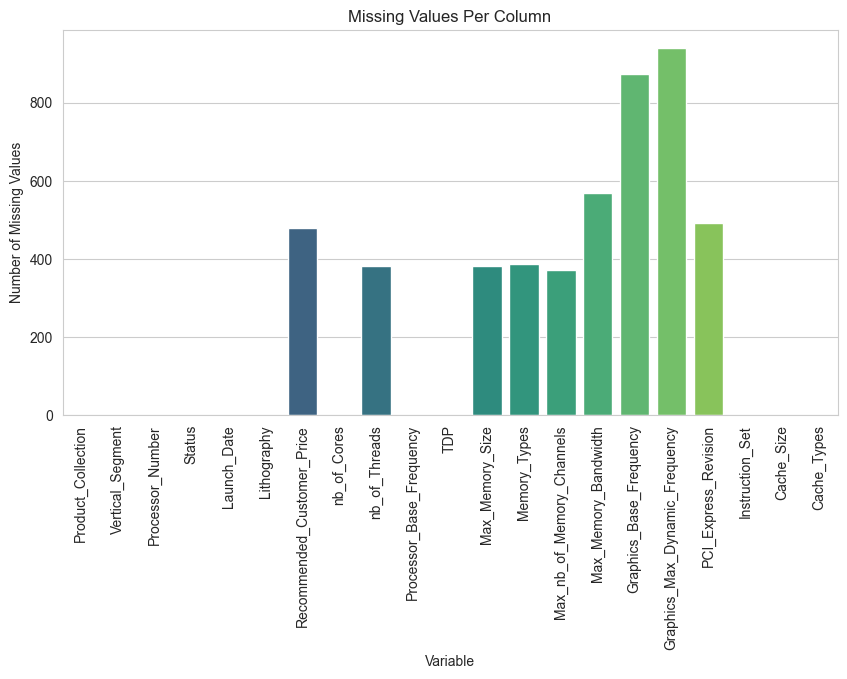

In [52]:
before = len(df)
cols_to_check = df.columns[df.isna().sum() < 400]  # Choose columns with less than 400 missing values
df.dropna(subset=cols_to_check, inplace=True)
df.dropna(subset=["Launch_Date"], inplace=True)
after = len(df)

print("Number of rows removed:", before - after)
plot()


### Fill in the missing data using the data from other columns

1279

                            Column  Missing Values
0               Product_Collection               0
1                 Vertical_Segment               0
2                 Processor_Number               0
3                           Status               0
4                      Launch_Date               0
5                      Lithography               0
6       Recommended_Customer_Price             480
7                      nb_of_Cores               0
8                    nb_of_Threads               0
9         Processor_Base_Frequency               0
10                             TDP               0
11                 Max_Memory_Size             382
12                    Memory_Types             387
13       Max_nb_of_Memory_Channels               0
14            Max_Memory_Bandwidth             569
15         Graphics_Base_Frequency             873
16  Graphics_Max_Dynamic_Frequency             939
17            PCI_Express_Revision             492
18                 Instruction_

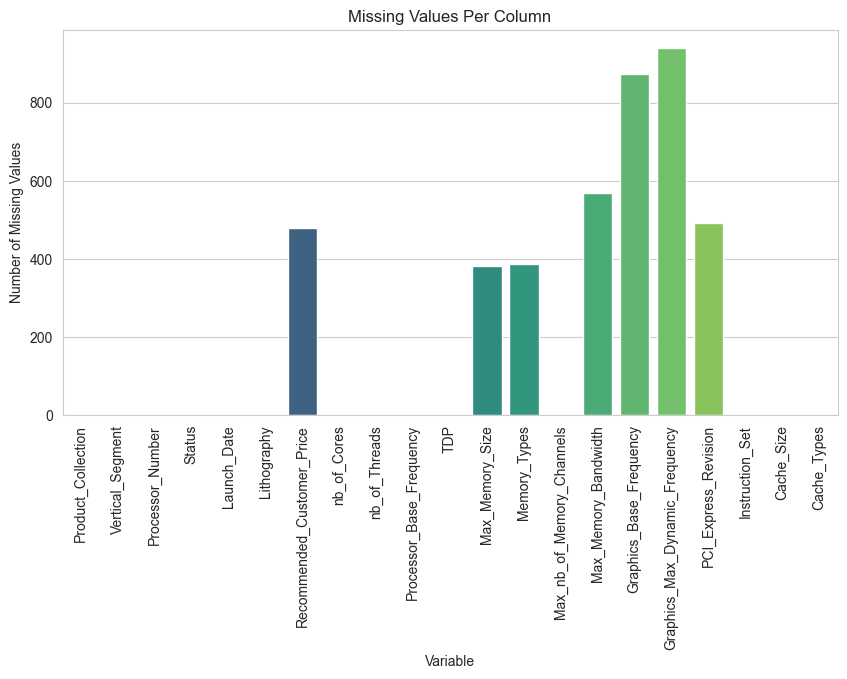

In [53]:
display(df['nb_of_Threads'].value_counts().sum())
df['nb_of_Threads'] = df['nb_of_Threads'].fillna(df['nb_of_Cores'])

def estimate_memory_channels(row):
    if pd.isnull(row["Max_nb_of_Memory_Channels"]):  
        if row["nb_of_Cores"] <= 4:
            return 1
        elif 4 < row["nb_of_Cores"] <= 8:
            return 2
        elif 8 < row["nb_of_Cores"] <= 12:
            return 3
        else:
            return 4
    return row["Max_nb_of_Memory_Channels"]

df["Max_nb_of_Memory_Channels"] = df.apply(estimate_memory_channels, axis=1)
plot()

### Apply mean for missing values

In [54]:
# RECOMMENDED CUSTOMER PRICE
print(round(df["Recommended_Customer_Price"].mean(), 2))
df["Recommended_Customer_Price"] = df["Recommended_Customer_Price"].fillna(round(df["Recommended_Customer_Price"].mean(), 2))

display(df["Recommended_Customer_Price"].head(5))

# MAX MEMORY SIZE
print(round(df["Max_Memory_Size"].mean(), 2))
df["Max_Memory_Size"] = df["Max_Memory_Size"].fillna(round(df["Max_Memory_Size"].mean(), 2))

display(df["Max_Memory_Size"].head(5))

# MAX MEMORY BANDWIDTH
print(round(df["Max_Memory_Bandwidth"].mean(), 1))
df["Max_Memory_Bandwidth"] = df["Max_Memory_Bandwidth"].fillna(round(df["Max_Memory_Bandwidth"].mean(), 1))
display(df["Max_Memory_Bandwidth"].head(5))
# GRAPHICS BASE FREQUENCY
print(round(df["Graphics_Base_Frequency"].mean(), 2))
df["Graphics_Base_Frequency"] = df["Graphics_Base_Frequency"].fillna(round(df["Graphics_Base_Frequency"].mean(), 2))

display(df["Graphics_Base_Frequency"].head(5))

# GRAPHICS MAX DYNAMIC FREQUENCY
print(round(df["Graphics_Max_Dynamic_Frequency"].mean(), 2))
df["Graphics_Max_Dynamic_Frequency"] = df["Graphics_Max_Dynamic_Frequency"].fillna(round(df["Graphics_Max_Dynamic_Frequency"].mean(), 2))

display(df["Graphics_Max_Dynamic_Frequency"].head(5))

# PCI EXPRESS REVISION
print(np.ceil(df["PCI_Express_Revision"].mean()))
df["PCI_Express_Revision"] = df["PCI_Express_Revision"].fillna(np.ceil(df["PCI_Express_Revision"].mean()))

display(df["PCI_Express_Revision"].head(5))



705.65


0    393.0
1    297.0
2    409.0
3    305.0
4    281.0
Name: Recommended_Customer_Price, dtype: float64

256.08


0    16.00
1    32.00
2    32.00
3    64.23
4    16.00
Name: Max_Memory_Size, dtype: float64

36.1


0    29.8
1    34.1
2    34.1
3    51.2
4    29.8
Name: Max_Memory_Bandwidth, dtype: float64

0.85


0    0.29
1    0.29
2    0.29
3    0.85
4    0.29
Name: Graphics_Base_Frequency, dtype: float64

1.03


0    1.05
1    1.10
2    1.15
3    1.03
4    0.93
Name: Graphics_Max_Dynamic_Frequency, dtype: float64

3.0


0    3.0
1    3.0
2    3.0
3    2.0
4    3.0
Name: PCI_Express_Revision, dtype: float64

### Apply forward fill

In [55]:

df["Memory_Types"] = df["Memory_Types"].ffill()
display(df["Memory_Types"].head(5))
df["Cache_Types"] = df["Cache_Types"].ffill()
display(df["Cache_Types"].head(5))
display(df["Cache_Types"].value_counts())

0    DDR3, DDR3L
1     DDR3, DDR4
2     DDR3, DDR4
3           DDR3
4    DDR3, DDR3L
Name: Memory_Types, dtype: object

0    SmartCache
1    SmartCache
2    SmartCache
3    SmartCache
4    SmartCache
Name: Cache_Types, dtype: object

Cache_Types
SmartCache          873
L2                  421
No Type             298
L3                   59
Last Level Cache     11
Name: count, dtype: int64

## After handing missing values

,Column (0-10),Missing (0-10),Column (11-20),Missing (11-20)
0,Product_Collection,0,Max_Memory_Size,0.0
1,Vertical_Segment,0,Memory_Types,0.0
2,Processor_Number,0,Max_nb_of_Memory_Channels,0.0
3,Status,0,Max_Memory_Bandwidth,0.0
4,Launch_Date,0,Graphics_Base_Frequency,0.0
5,Lithography,0,Graphics_Max_Dynamic_Frequency,0.0
6,Recommended_Customer_Price,0,PCI_Express_Revision,0.0
7,nb_of_Cores,0,Instruction_Set,0.0
8,nb_of_Threads,0,Cache_Size,0.0
9,Processor_Base_Frequency,0,Cache_Types,0.0


                            Column  Missing Values
0               Product_Collection               0
1                 Vertical_Segment               0
2                 Processor_Number               0
3                           Status               0
4                      Launch_Date               0
5                      Lithography               0
6       Recommended_Customer_Price               0
7                      nb_of_Cores               0
8                    nb_of_Threads               0
9         Processor_Base_Frequency               0
10                             TDP               0
11                 Max_Memory_Size               0
12                    Memory_Types               0
13       Max_nb_of_Memory_Channels               0
14            Max_Memory_Bandwidth               0
15         Graphics_Base_Frequency               0
16  Graphics_Max_Dynamic_Frequency               0
17            PCI_Express_Revision               0
18                 Instruction_

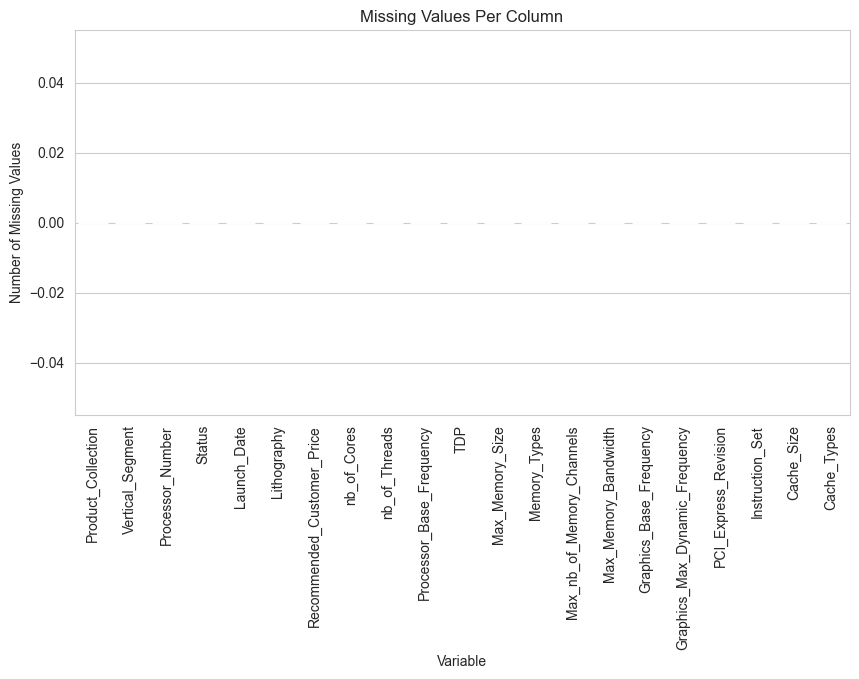

In [56]:
missing_counts = df.isnull().sum()
missing_data = missing_counts.reset_index()
missing_data.columns = ["Column", "Missing Values"]

# Split into two parts
left = missing_data.iloc[0:11].reset_index(drop=True)
right = missing_data.iloc[11:21].reset_index(drop=True)

# Combine side by side
combined = pd.concat([left, right], axis=1)

# Rename columns for clarity
combined.columns = ["Column (0-10)", "Missing (0-10)", "Column (11-20)", "Missing (11-20)"]

# Print the combined result
display(combined)
plot()

# Descriptive Statistic

,Launch_Date,Lithography,Recommended_Customer_Price,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,Cache_Size,TDP,Max_Memory_Size,Max_nb_of_Memory_Channels,Max_Memory_Bandwidth,Graphics_Max_Dynamic_Frequency,Graphics_Base_Frequency,PCI_Express_Revision
count,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000
mean,2012.185018,32.217810,705.649838,4.451264,7.073406,2.396990,8.028204,59.940824,256.076913,2.170878,36.086342,1.029994,0.852359,2.706378
std,3.281299,19.327077,989.074560,6.715046,8.876266,0.703029,9.312501,44.135360,499.698435,1.329395,25.473587,0.113955,8.573146,0.455558
min,2003.250000,14.000000,9.620000,1.000000,1.000000,0.390625,0.015625,0.650000,1.000000,1.000000,1.600000,0.490000,0.100000,2.000000
25%,2010.000000,22.000000,218.500000,2.000000,2.000000,1.900000,3.000000,28.000000,32.000000,1.000000,25.600000,1.030000,0.340000,2.000000
50%,2012.500000,22.000000,445.000000,2.000000,4.000000,2.400000,4.000000,47.500000,64.000000,2.000000,34.100000,1.030000,0.850000,3.000000
75%,2014.500000,45.000000,705.650000,4.000000,8.000000,2.922500,8.000000,84.000000,256.080000,2.000000,36.100000,1.050000,0.850000,3.000000
max,2017.500000,130.000000,8898.000000,72.000000,72.000000,4.300000,60.000000,300.000000,4198.400000,16.000000,352.000000,1.350000,350.000000,3.000000


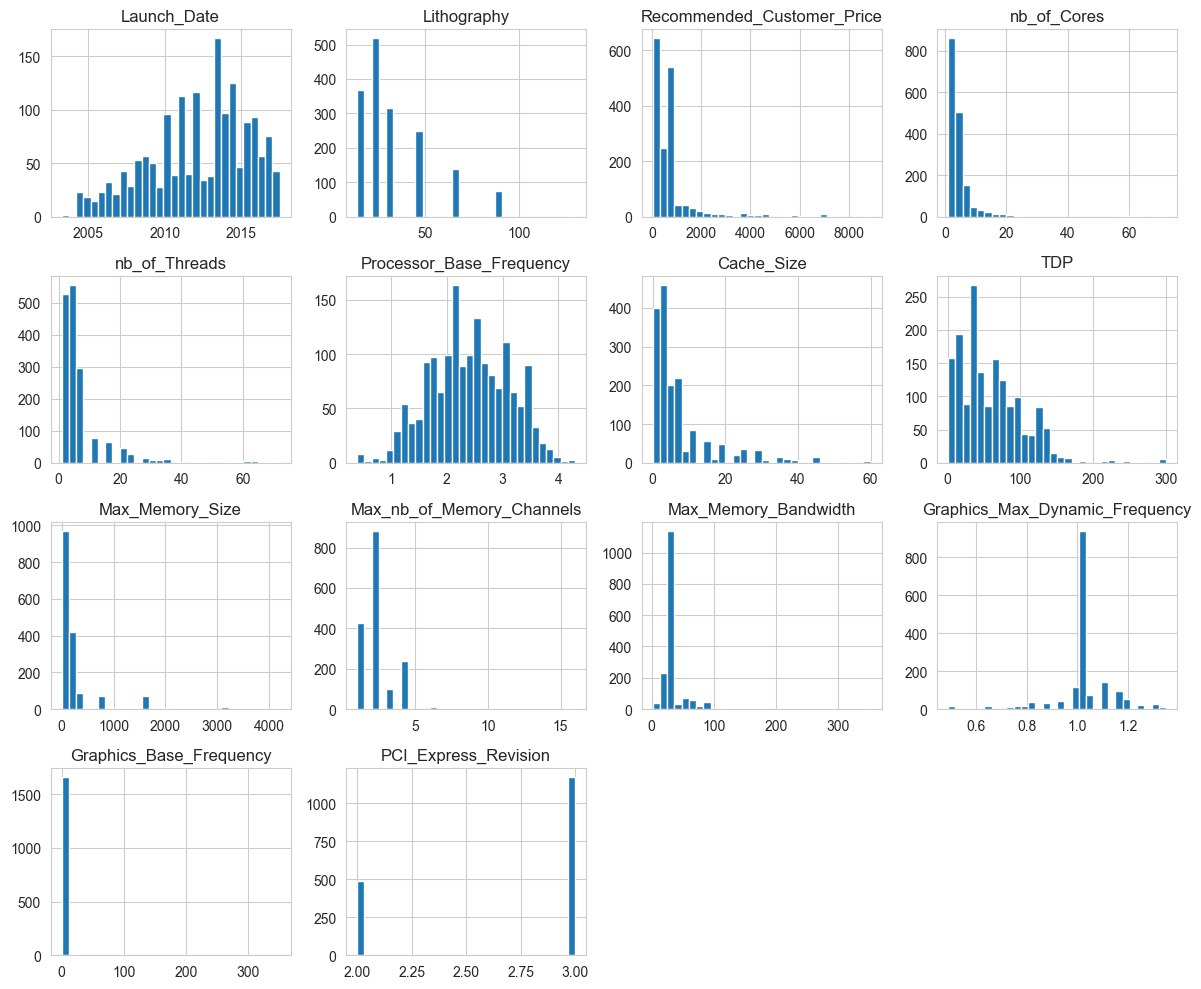

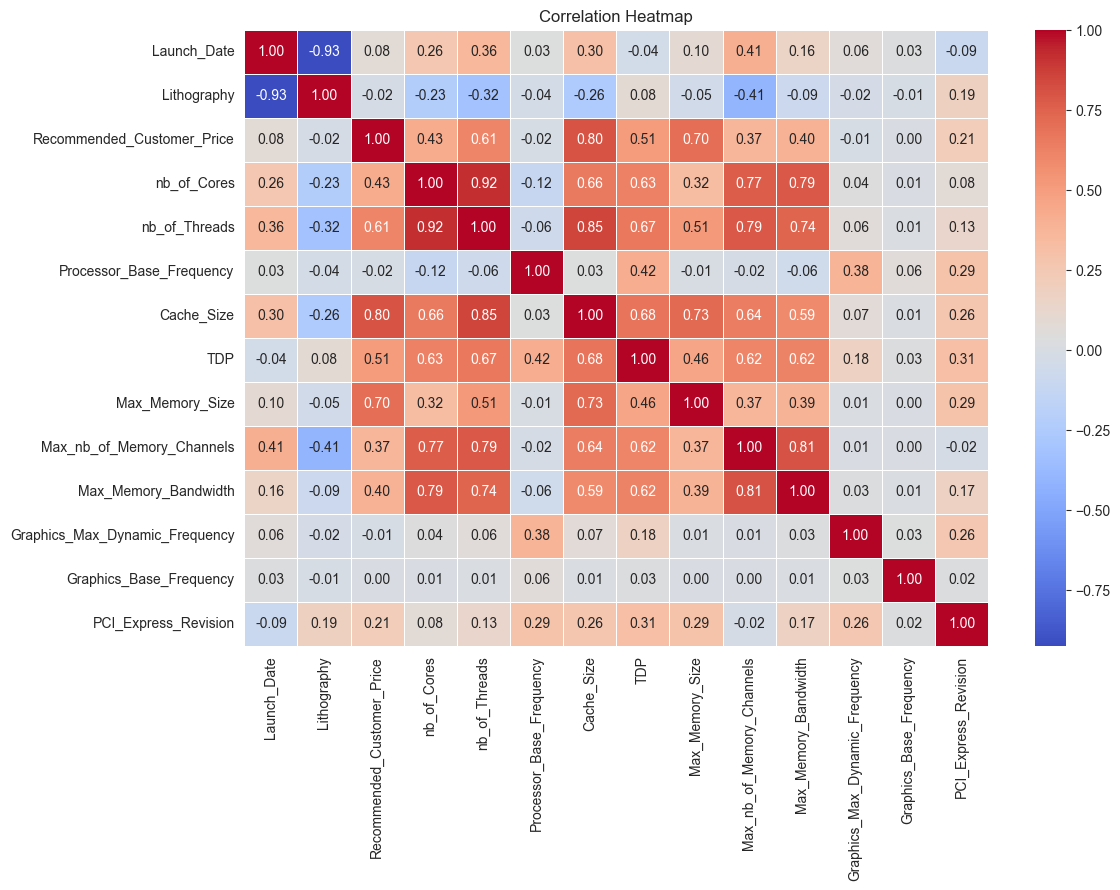

In [57]:
import pandas as pd

numerical_cols = [
    "Launch_Date", "Lithography", "Recommended_Customer_Price", "nb_of_Cores", "nb_of_Threads",
    "Processor_Base_Frequency", "Cache_Size", "TDP", "Max_Memory_Size",
    "Max_nb_of_Memory_Channels", "Max_Memory_Bandwidth", "Graphics_Max_Dynamic_Frequency",
    "Graphics_Base_Frequency", "PCI_Express_Revision"
]

df_numerical = df[numerical_cols]

categorical_cols = [col for col in df.columns if col not in numerical_cols and col != "Processor_Number"]
df_categorical = df[categorical_cols]
display(df_numerical.describe())
import matplotlib.pyplot as plt

df_numerical.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

import seaborn as sns

# Compute correlation matrix
corr_matrix = df_numerical.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()




In [58]:
for col in df_categorical.columns:
    display(df_categorical[col].value_counts())  
    print("\n")



Product_Collection
Core       655
Xeon       516
Pentium    195
Celeron    182
Atom        92
Itanium     14
Quark        8
Name: count, dtype: int64

Vertical_Segment
Mobile      539
Server      498
Desktop     464
Embedded    161
Name: count, dtype: int64

Status
Launched                      912
End of Interactive Support    383
End of Life                   360
Announced                       7
Name: count, dtype: int64

Memory_Types
DDR3                 807
DDR3, DDR3L          339
DDR4                 144
DDR3L                115
DDR3L, DDR4           87
DDR3, DDR3L, DDR4     74
DDR3, DDR4            55
DDR2                  36
DDR2, DDR3             3
DDR1                   2
Name: count, dtype: int64

Instruction_Set
64-bit    1579
32-bit      83
Name: count, dtype: int64

Cache_Types
SmartCache          873
L2                  421
No Type             298
L3                   59
Last Level Cache     11
Name: count, dtype: int64

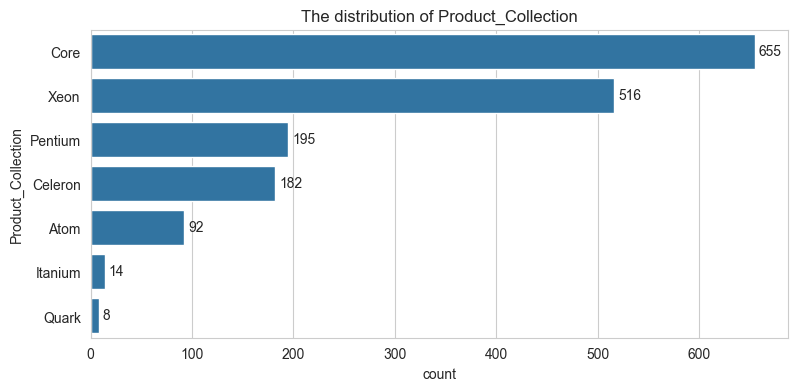

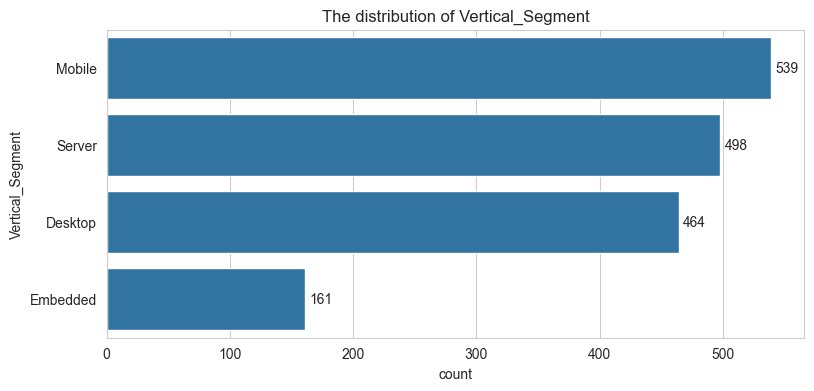

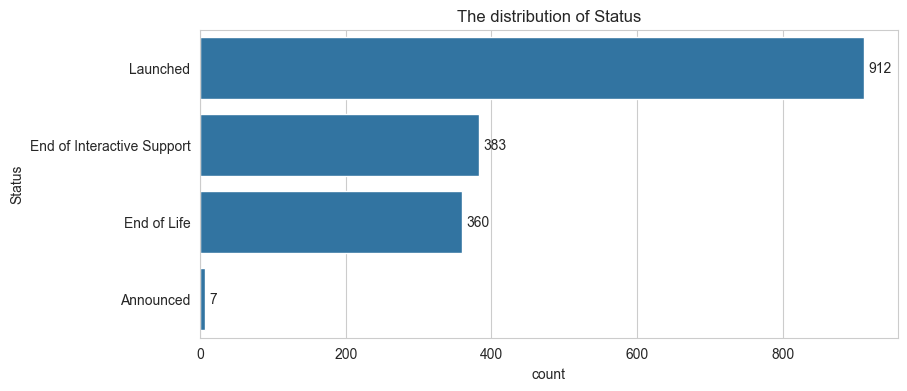

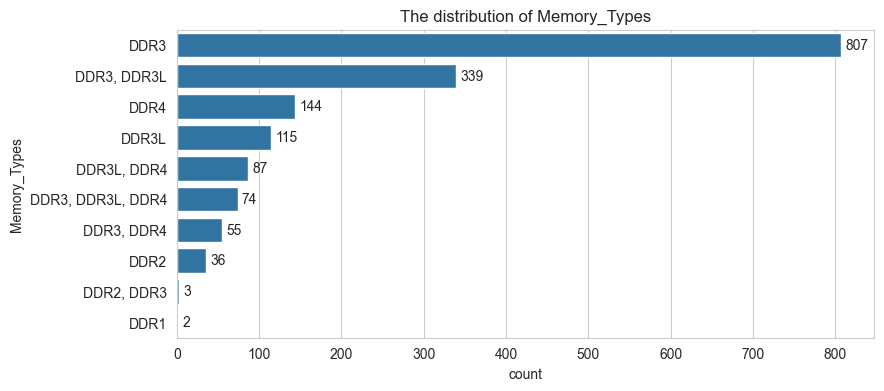

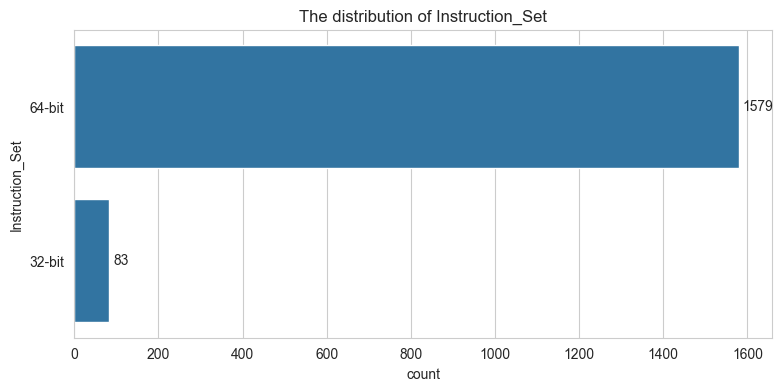

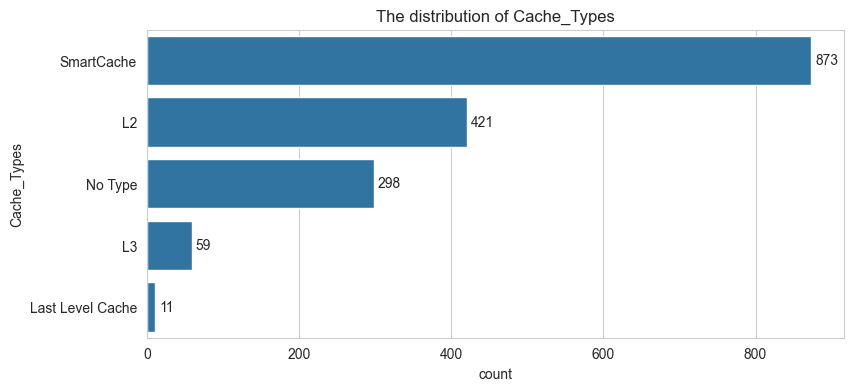

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df_categorical.columns:
    plt.figure(figsize=(9, 4))
    ax = sns.countplot(y=df_categorical[col], order=df_categorical[col].value_counts().index)
    plt.title(f"The distribution of {col}")
    
    # Add count labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=3)
    
    plt.show()


# Inferential Statistic

## Estimating the Average Number of Threads in Intel CPUs Using Parameter Estimation

**Objective:**  
The goal of this analysis is to estimate the **average number of threads** (`nb_of_Threads`) in Intel Core CPUs using **parameter estimation methods**.

**Methodology:**  

Using **point estimation** and **confidence interval estimation** for the population mean, the following steps were taken:

- **Point Estimation (Sample Mean):**

    - The sample mean $\bar{x}$ is calculated using the formula:  
        $$
        \bar{x} = \frac{\sum x_i}{n} 
        $$
        where $x_i$ is the number of threads for each CPU and $n$ is the sample size.

- **Confidence Interval Estimation (95%):**

    - The 95% confidence interval is calculated using the formula:  
        $$
        CI = \bar{x} \pm t_{\alpha/2, n-1} \times \frac{s}{\sqrt{n}}  
        $$
        where:  
        - $\bar{x}$ = sample mean  
        - $s$ = sample standard deviation  
        - $n$ = sample size  
        - $t_{\alpha/2, n-1}$ = critical value from the t-distribution with 95% confidence  

**Results:**  

- **Sample mean:** 4.83 threads  
- **95% Confidence Interval:** (4.63, 5.03)

**Remarks:**  

- The estimated average number of threads for Intel Core CPUs is approximately **4.83**.

- The 95% confidence interval of **(4.63 to 5.03)** indicates that we can be 95% confident that the true average number of threads lies within this range.

- The narrow confidence interval suggests that the result is **highly precise**.

- This result aligns with expectations, as many mainstream Intel Core CPUs typically have between **4 and 5 threads**.

**Conclusion:**  

- The average number of threads in Intel Core CPUs is estimated to be **4.83**, with a 95% confidence interval from **4.63 to 5.03**.

- This result suggests that Intel Core CPUs in the dataset generally have **around 4 to 5 threads**.

- These findings help users and businesses better understand the **common characteristics** of Intel Core CPUs.


In [60]:
import scipy.stats as stats

# Filter the DataFrame for Intel Core processors
df_intel_core = df[df["Product_Collection"].str.contains("Core")]

# Fetch the 'nb_of_Threads' column
threads_data = df_intel_core["nb_of_Threads"]
mean_threads = np.mean(threads_data)
std_threads = np.std(threads_data, ddof=1)
n = len(threads_data)

# Calculate the t-value for 95% confidence level
t_value = stats.t.ppf(0.975, df=n-1)

# Calculate the confidence interval
# 95% Confidence Interval
margin_error = t_value * (std_threads / np.sqrt(n))
ci_lower = mean_threads - margin_error
ci_upper = mean_threads + margin_error

print("Sample mean: ≈ " + str(mean_threads))
print("95% Confidence Interval: (" + str(ci_lower) + ", " + str(ci_upper) + ")")


Sample mean: ≈ 4.8290076335877865
95% Confidence Interval: (4.631479018590857, 5.026536248584716)


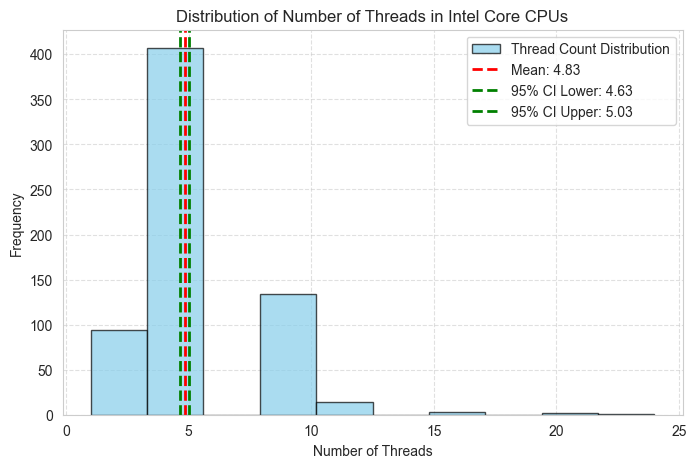

In [61]:
plt.figure(figsize=(8, 5))
plt.hist(threads_data, bins=10, color='skyblue', edgecolor='black', alpha=0.7, label="Thread Count Distribution")

# Draw the mean line
plt.axvline(mean_threads, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_threads:.2f}")

# Draw the confidence interval lines
plt.axvline(ci_lower, color='green', linestyle='dashed', linewidth=2, label=f"95% CI Lower: {ci_lower:.2f}")
plt.axvline(ci_upper, color='green', linestyle='dashed', linewidth=2, label=f"95% CI Upper: {ci_upper:.2f}")

# Add labels and title
plt.xlabel("Number of Threads")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Threads in Intel Core CPUs")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## CPU Price Analysis Using Hypothesis Testing

## Objective:
Determine whether there is a significant price difference between **Desktop** and **Server** CPUs.

## Methodology:

- Use an **independent t-test** to compare the average prices between the two CPU groups:

    - H₀ (Null Hypothesis): There is no difference in the average price between Desktop and Server CPUs.

    - H₁ (Alternative Hypothesis): The average price of Server CPUs is higher than that of Desktop CPUs.

- Conditions for applying the test:

    - The sample is normally distributed (or the sample size is large enough for the Central Limit Theorem to apply).

    - The variances of the two groups may be equal or unequal (Levene’s test is used to check this).

## Results:

- **Average price of Desktop CPUs:** \$364.77  
- **Average price of Server CPUs:** \$1360.64  
- **t-statistic:** 13.92 (indicating a large difference between the two groups)  
- **p-value:** $7.93 \times 10^{-38}$  

## Interpretation:

- The p-value is very small (< 0.05), meaning there is sufficient evidence to **reject the null hypothesis (H₀).**

- This indicates that **Server CPUs are significantly more expensive** than Desktop CPUs.

## Conclusion:

- **Server CPUs** are much more expensive than **Desktop CPUs**.

- This may be due to Server CPUs having **more cores, larger caches**, and **support for specialized features** like ECC memory and stronger multithreading capabilities.

- If high performance is required for tasks such as data processing or virtualization, Server CPUs are a reasonable choice despite the higher price.

- For users who need a **cheaper yet powerful CPU**, Desktop CPUs are an optimal choice for **gaming, office work, or programming**.


In [62]:
from scipy.stats import ttest_ind

# Filter the DataFrame for Desktop and Server vertical segments
df_filtered = df[df["Vertical_Segment"].isin(["Desktop", "Server"])]
desktop_prices = df_filtered[df_filtered["Vertical_Segment"] == "Desktop"]["Recommended_Customer_Price"]
server_prices = df_filtered[df_filtered["Vertical_Segment"] == "Server"]["Recommended_Customer_Price"]

# Perform Welch's t-test
t_stat, p_value = ttest_ind(server_prices, desktop_prices, equal_var=False)  # Sử dụng Welch’s t-test

# Calculate means
mean_desktop = desktop_prices.mean()
mean_server = server_prices.mean()

t_stat, p_value, mean_desktop, mean_server

(13.878400722077886,
 1.2566044547732163e-37,
 362.6626077586207,
 1352.400702811245)

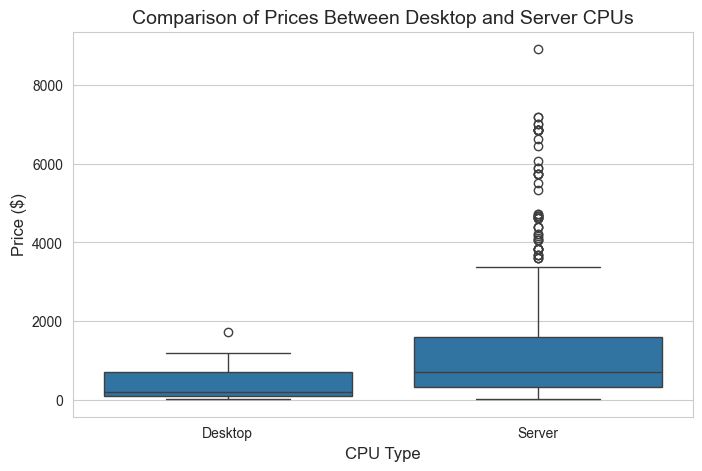

In [63]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Draw the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered["Vertical_Segment"], 
            y=df_filtered["Recommended_Customer_Price"])

plt.title("Comparison of Prices Between Desktop and Server CPUs", fontsize=14)
plt.ylabel("Price ($)", fontsize=12)
plt.xlabel("CPU Type", fontsize=12)
plt.show()

## CPU Performance Analysis using Linear Regression

### Objective:
Predict CPU performance (measured by **Processor Base Frequency**) based on the number of cores (`nb_of_Cores`) and cache size (`Cache`).

### Methodology:

- Build a **multiple linear regression model**:
  $$
  Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \epsilon
  $$

  - $Y$: Processor Base Frequency (`Processor_Base_Frequency`)  
  - $X_1$: Number of Cores (`nb_of_Cores`)  
  - $X_2$: Cache Size (`Cache`)  
  - $\beta_0, \beta_1, \beta_2$: Regression coefficients  
  - $\epsilon$: Error term

- Evaluate model significance using **p-values** and the **coefficient of determination** $R^2$.

### Results:

- Regression equation:
  $$
  \text{Base Frequency} = 2.3949 - 0.0253 \times \text{Cores} + 0.0142 \times \text{Cache}
  $$

- **R-squared**: 0.034 (only 3.4% of the variation in base frequency is explained by cores and cache size).

- **p-values** of individual predictors:
  - `nb_of_Cores`: $-0.0253$, p-value < 0.05 → number of cores has a statistically significant **negative** impact on base frequency.
  - `Cache`: $0.0142$, p-value < 0.05 → cache size has a statistically significant **positive** impact on base frequency.

### Interpretation:

- CPUs with more cores tend to have a lower base frequency. This is consistent with the trend that multi-core CPUs are optimized for multi-threading rather than high clock speeds.

- Larger cache size is associated with slightly higher base frequency, although the effect is relatively small.

### Conclusion:

- If your goal is **high clock speed** (e.g., for gaming or single-threaded applications), choose a CPU with **fewer cores** but **higher frequency**.

- If your goal is **multi-tasking, data processing, or AI workloads**, prioritize CPUs with **more cores**, even if the base frequency is lower.


In [64]:
import statsmodels.api as sm

# These are the independent variables
X = df[["nb_of_Cores", "Cache_Size"]]
Y = df["Processor_Base_Frequency"]

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Processor_Base_Frequency   R-squared:                       0.034
Model:                                  OLS   Adj. R-squared:                  0.033
Method:                       Least Squares   F-statistic:                     29.35
Date:                      Sat, 12 Apr 2025   Prob (F-statistic):           2.97e-13
Time:                              21:51:34   Log-Likelihood:                -1743.3
No. Observations:                      1662   AIC:                             3493.
Df Residuals:                          1659   BIC:                             3509.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.3937      0.022    106.422      0.000       2.350       2.438
nb_of_Cores    -0.0254      0.003     -7.547      0.000      -0.032      -0.019
Cache_Size      0.0145      0.002      5.974      0.000       0.010       0.019
==============================================================================
Omnibus:                       27.963   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.244
Skew:                          -0.030   Prob(JB):                     0.000297
Kurtosis:                       2.519   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

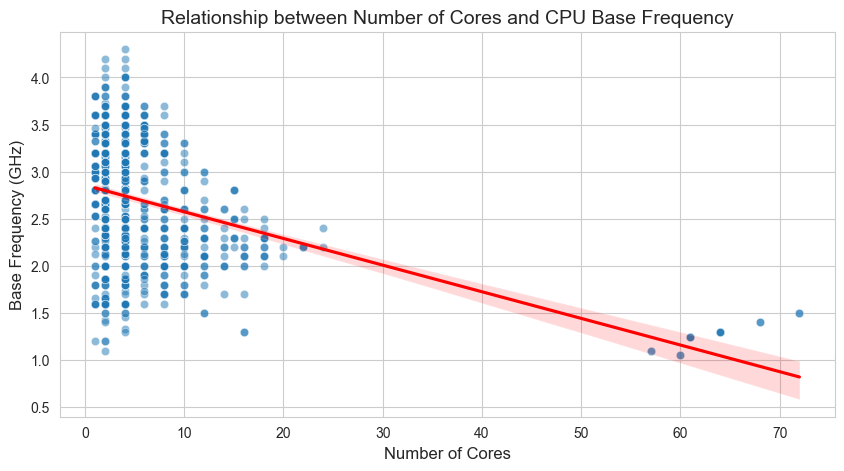

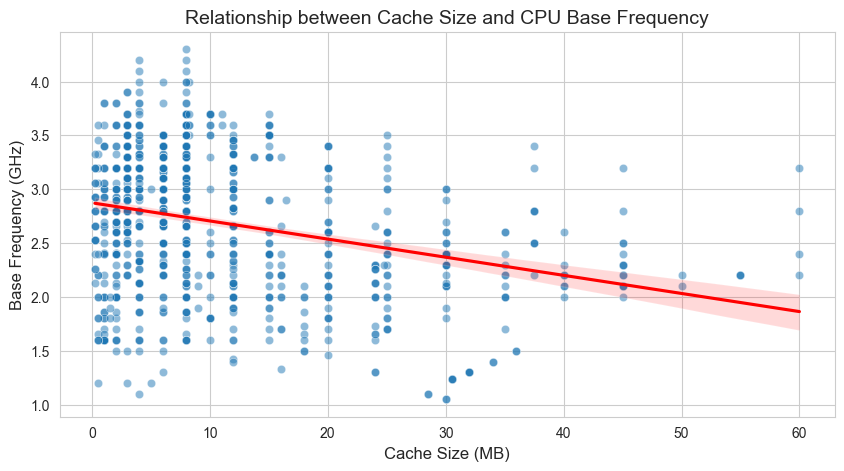

In [65]:
sns.set_style("whitegrid")

# Plot the relationship between number of cores and base frequency
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_filtered["nb_of_Cores"], y=df_filtered["Processor_Base_Frequency"], alpha=0.5)
sns.regplot(x=df_filtered["nb_of_Cores"], y=df_filtered["Processor_Base_Frequency"], scatter=False, color="red")
plt.title("Relationship between Number of Cores and CPU Base Frequency", fontsize=14)
plt.xlabel("Number of Cores", fontsize=12)
plt.ylabel("Base Frequency (GHz)", fontsize=12)
plt.show()

# Plot the relationship between cache size and base frequency
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_filtered["Cache_Size"], y=df_filtered["Processor_Base_Frequency"], alpha=0.5)
sns.regplot(x=df_filtered["Cache_Size"], y=df_filtered["Processor_Base_Frequency"], scatter=False, color="red")
plt.title("Relationship between Cache Size and CPU Base Frequency", fontsize=14)
plt.xlabel("Cache Size (MB)", fontsize=12)
plt.ylabel("Base Frequency (GHz)", fontsize=12)
plt.show()



## CPU Power Consumption Analysis using One-Way ANOVA

**Objective:** Determine whether the number of cores (`nb_of_Cores`) affects power consumption (`TDP`).

**Method:**

- Use **One-way ANOVA** to test whether there is a significant difference in TDP among CPUs with different numbers of cores.

- Hypotheses:

    - $H_0$ (Null Hypothesis): There is no significant difference in TDP among CPUs with different core counts.

    - $H_1$ (Alternative Hypothesis): At least one core group has a significantly different TDP compared to the others.

**Results:**

- F-statistic = $99.05$

- p-value = $1.06 \times 10^{-255}$ (≈ 0, extremely small)

**Interpretation:**

- Since the p-value is much smaller than 0.05 → we reject the null hypothesis → there is a significant difference in TDP among CPU groups with different core counts.

- This indicates that the number of cores strongly influences power consumption (TDP).

- However, it is important to consider other factors (like Cache), as not all CPUs with high core counts necessarily have high TDP.

**Conclusion:**

- The number of cores (`nb_of_Cores`) significantly affects power consumption (`TDP`). CPUs with more cores generally have higher TDP.

- This reflects real-world technical behavior: CPUs with more cores typically require more power to maintain performance. This insight is useful when designing systems, balancing core count and energy consumption.



One-Way ANOVA Results Table:
                      sum_sq      df         F         PR(>F)
C(nb_of_Cores)  1.720170e+06    19.0  98.10253  8.403396e-254
Residual        1.515342e+06  1642.0       NaN            NaN


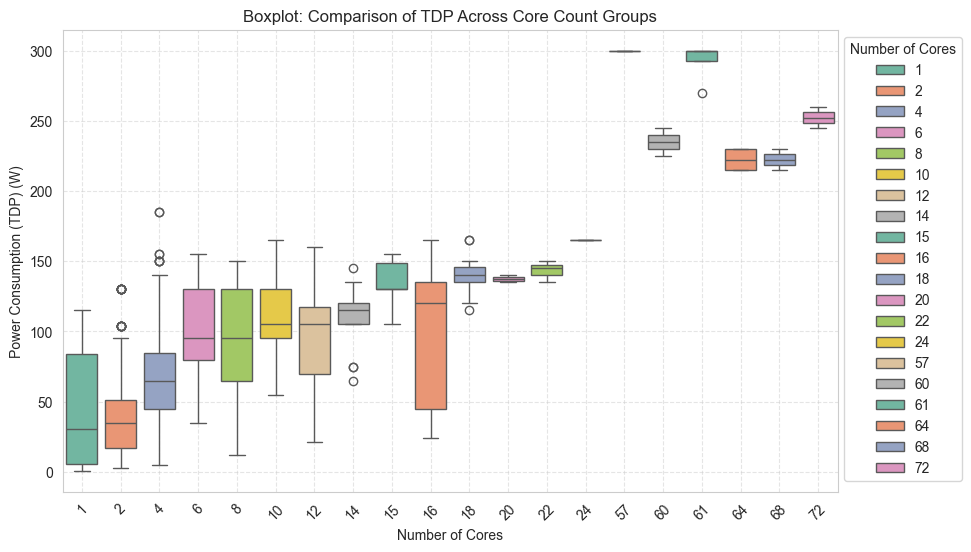

In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Convert the 'nb_of_Cores' column to a categorical variable
df["TDP"] = pd.to_numeric(df["TDP"].astype(str).str.replace(" W", "", regex=True), errors="coerce")

# Perform One-way ANOVA
model = ols('TDP ~ C(nb_of_Cores)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("\nOne-Way ANOVA Results Table:")
print(anova_table)

# Draw a boxplot to visualize TDP across core groups
plt.figure(figsize=(10, 6))
sns.boxplot(x="nb_of_Cores", y="TDP", hue="nb_of_Cores", data=df, palette="Set2", dodge=False)
plt.xlabel("Number of Cores")
plt.ylabel("Power Consumption (TDP) (W)")
plt.title("Boxplot: Comparison of TDP Across Core Count Groups")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Number of Cores", bbox_to_anchor=(1, 1))
plt.show()
